<a href="https://colab.research.google.com/github/arvind-maurya/MachineLearning/blob/master/Assignment/AIMLCEP_ARVIND_MAURYA_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Solution to Assignment question (Q2-a)**

### (a) [C, R] Some of the attributes in the data set are text data. Use a suitable procedure to convert them into suitable numerical representations in the training data and test data. Explain the procedure you used for the conversion.


In this session, we shall apply logistic regression and look at predictions using it.

In [271]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us load the Q2 Classification train data

In [272]:
spam_class_train_data = pd.read_excel('https://github.com/arvind-maurya/MachineLearning/blob/master/Assignment/Q2/Q2_classification_train.xlsx?raw=true', index_col=False, header=0)

#print the first few rows of the data 
spam_class_train_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,0,0,0,no,0,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,0,0,0,no,0,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,0,0,0,no,0,0,0,13.256,255,1,0,0,0,48,small
3,0,0,1,0,0,0,0,0,no,0,0,2,1.231,29,0,0,0,0,1,none
4,0,0,1,0,0,0,0,0,no,0,0,2,1.091,25,0,0,0,0,1,none


In [273]:
#We see two data attributes namely winner and number as text data. We need to convert this to numerical data
#Get the unique value of winner attribute
winner = np.unique(spam_class_train_data['winner'])
print('winner attribute unique value:',winner)

number = np.unique(spam_class_train_data['number'])
print('number attribute unique value:', number)
#spam_class_train_data.describe()

winner attribute unique value: ['no' 'yes']
number attribute unique value: ['big' 'none' 'small']


We can now generate a label encoding scheme for mapping each category to a numeric value by leveraging scikit-learn

In [274]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
#transform winner column into numerical column
winner_tf = gle.fit_transform(spam_class_train_data['winner'])
winner_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
winner_mappings

{0: 'no', 1: 'yes'}

In [275]:
number_tf = gle.fit_transform(spam_class_train_data['number'])
number_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
number_mappings

{0: 'big', 1: 'none', 2: 'small'}

In [276]:
spam_class_train_data['winner_tf'] = winner_tf
spam_class_train_data['number_tf'] = number_tf
spam_class_train_data

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,winner_tf,number_tf
0,0,0,1,0,0,0,0,0,no,0,0,0,11.370,202,1,0,0,0,0,big,0,0
1,0,0,1,0,0,0,0,0,no,0,0,0,10.504,202,1,0,0,0,1,small,0,2
2,0,0,1,0,0,0,0,0,no,0,0,0,13.256,255,1,0,0,0,48,small,0,2
3,0,0,1,0,0,0,0,0,no,0,0,2,1.231,29,0,0,0,0,1,none,0,1
4,0,0,1,0,0,0,0,0,no,0,0,2,1.091,25,0,0,0,0,1,none,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,no,0,0,0,1.597,46,0,0,1,0,3,small,0,2
3132,1,0,1,0,0,0,0,1,no,0,0,0,0.333,13,0,0,0,0,0,big,0,0
3133,1,0,1,0,0,0,0,0,no,0,0,0,0.332,12,0,0,0,0,0,small,0,2
3134,1,0,1,0,0,0,0,2,yes,0,0,0,2.225,65,0,0,1,0,1,small,1,2


In [277]:
#Lets rearrange the transformed column and drop the original column
column_names = ['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'image', 'attach',
       'dollar', 'winner', 'winner_tf' ,'inherit', 'viagra', 'password', 'num_char',
       'line_breaks', 'format', 're_subj', 'exclaim_subj', 'urgent_subj',
       'exclaim_mess', 'number', 'number_tf']

spam_class_train_data_tf = spam_class_train_data.reindex(columns=column_names)
spam_class_train_data_tf



,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,number_tf
0,0,0,1,0,0,0,0,0,no,0,0,0,0,11.370,202,1,0,0,0,0,big,0
1,0,0,1,0,0,0,0,0,no,0,0,0,0,10.504,202,1,0,0,0,1,small,2
2,0,0,1,0,0,0,0,0,no,0,0,0,0,13.256,255,1,0,0,0,48,small,2
3,0,0,1,0,0,0,0,0,no,0,0,0,2,1.231,29,0,0,0,0,1,none,1
4,0,0,1,0,0,0,0,0,no,0,0,0,2,1.091,25,0,0,0,0,1,none,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,no,0,0,0,0,1.597,46,0,0,1,0,3,small,2
3132,1,0,1,0,0,0,0,1,no,0,0,0,0,0.333,13,0,0,0,0,0,big,0
3133,1,0,1,0,0,0,0,0,no,0,0,0,0,0.332,12,0,0,0,0,0,small,2
3134,1,0,1,0,0,0,0,2,yes,1,0,0,0,2.225,65,0,0,1,0,1,small,2


In [278]:
#Lets Drop original column in dataframe
spam_class_train_data_tf= spam_class_train_data_tf.drop(['winner','number'], axis=1)
spam_class_train_data_tf


,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
0,0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1,0,1,0,0,0,0,2,0,0,0,0,1.597,46,0,0,1,0,3,2
3132,1,0,1,0,0,0,0,1,0,0,0,0,0.333,13,0,0,0,0,0,0
3133,1,0,1,0,0,0,0,0,0,0,0,0,0.332,12,0,0,0,0,0,2
3134,1,0,1,0,0,0,0,2,1,0,0,0,2.225,65,0,0,1,0,1,2


Now Lets transform the test data

In [279]:
spam_class_test_data = pd.read_excel('https://github.com/arvind-maurya/MachineLearning/blob/master/Assignment/Q2/Q2_classification_test.xlsx?raw=true', index_col=False, header=0)

#print the first few rows of the data 
spam_class_test_data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,1,0,1,0,0,0,0,0,no,0,0,0,20.133,364,1,0,0,0,8,small
1,1,0,1,0,0,0,0,0,no,0,0,0,3.796,71,1,0,0,0,4,small
2,1,0,1,0,0,0,0,0,no,0,0,0,2.705,35,1,0,0,0,0,none
3,1,0,1,4,0,0,2,0,no,0,0,0,0.537,22,0,0,0,0,3,small
4,1,0,1,0,0,0,0,0,no,0,0,0,4.174,2,0,0,0,0,0,none


In [280]:
#We see two data attributes namely winner and number as text data. We need to convert this to numerical data
#Get the unique value of winner attribute
winner = np.unique(spam_class_test_data['winner'])
print('winner attribute unique value:',winner)

number = np.unique(spam_class_test_data['number'])
print('number attribute unique value:', number)
#spam_class_train_data.describe()

winner attribute unique value: ['no' 'yes']
number attribute unique value: ['big' 'none' 'small']


In [281]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
#transform winner column into numerical column
winner_tf = gle.fit_transform(spam_class_test_data['winner'])
winner_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
winner_mappings

{0: 'no', 1: 'yes'}

In [282]:
number_tf = gle.fit_transform(spam_class_test_data['number'])
number_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
number_mappings

{0: 'big', 1: 'none', 2: 'small'}

In [283]:
spam_class_test_data['winner_tf'] = winner_tf
spam_class_test_data['number_tf'] = number_tf
spam_class_test_data

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,winner_tf,number_tf
0,1,0,1,0,0,0,0,0,no,0,0,0,20.133,364,1,0,0,0,8,small,0,2
1,1,0,1,0,0,0,0,0,no,0,0,0,3.796,71,1,0,0,0,4,small,0,2
2,1,0,1,0,0,0,0,0,no,0,0,0,2.705,35,1,0,0,0,0,none,0,1
3,1,0,1,4,0,0,2,0,no,0,0,0,0.537,22,0,0,0,0,3,small,0,2
4,1,0,1,0,0,0,0,0,no,0,0,0,4.174,2,0,0,0,0,0,none,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,no,0,0,0,31.104,744,1,0,0,0,3,small,0,2
781,0,0,1,0,0,0,0,0,no,0,0,0,30.201,728,1,0,0,0,3,small,0,2
782,0,0,1,0,0,0,0,10,no,0,0,0,74.753,1953,1,0,0,0,27,small,0,2
783,0,0,1,0,0,0,0,25,no,0,0,0,16.863,570,1,0,0,0,3,small,0,2


In [284]:
#Lets rearrange the transformed column and drop the original column
column_names = ['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'image', 'attach',
       'dollar', 'winner', 'winner_tf' ,'inherit', 'viagra', 'password', 'num_char',
       'line_breaks', 'format', 're_subj', 'exclaim_subj', 'urgent_subj',
       'exclaim_mess', 'number', 'number_tf']

spam_class_test_data_tf = spam_class_test_data.reindex(columns=column_names)
spam_class_test_data_tf



,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,number_tf
0,1,0,1,0,0,0,0,0,no,0,0,0,0,20.133,364,1,0,0,0,8,small,2
1,1,0,1,0,0,0,0,0,no,0,0,0,0,3.796,71,1,0,0,0,4,small,2
2,1,0,1,0,0,0,0,0,no,0,0,0,0,2.705,35,1,0,0,0,0,none,1
3,1,0,1,4,0,0,2,0,no,0,0,0,0,0.537,22,0,0,0,0,3,small,2
4,1,0,1,0,0,0,0,0,no,0,0,0,0,4.174,2,0,0,0,0,0,none,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,no,0,0,0,0,31.104,744,1,0,0,0,3,small,2
781,0,0,1,0,0,0,0,0,no,0,0,0,0,30.201,728,1,0,0,0,3,small,2
782,0,0,1,0,0,0,0,10,no,0,0,0,0,74.753,1953,1,0,0,0,27,small,2
783,0,0,1,0,0,0,0,25,no,0,0,0,0,16.863,570,1,0,0,0,3,small,2


In [285]:
#Lets Drop original column in test dataframe
spam_class_test_data_tf = spam_class_test_data_tf.drop(['winner', 'number'], axis=1)
spam_class_test_data_tf

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
0,1,0,1,0,0,0,0,0,0,0,0,0,20.133,364,1,0,0,0,8,2
1,1,0,1,0,0,0,0,0,0,0,0,0,3.796,71,1,0,0,0,4,2
2,1,0,1,0,0,0,0,0,0,0,0,0,2.705,35,1,0,0,0,0,1
3,1,0,1,4,0,0,2,0,0,0,0,0,0.537,22,0,0,0,0,3,2
4,1,0,1,0,0,0,0,0,0,0,0,0,4.174,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,1,0,0,0,0,0,0,0,0,0,31.104,744,1,0,0,0,3,2
781,0,0,1,0,0,0,0,0,0,0,0,0,30.201,728,1,0,0,0,3,2
782,0,0,1,0,0,0,0,10,0,0,0,0,74.753,1953,1,0,0,0,27,2
783,0,0,1,0,0,0,0,25,0,0,0,0,16.863,570,1,0,0,0,3,2


In [286]:
#Let us now compute the size of train and test data post transformation of non numeric column
n_train = len(spam_class_train_data_tf.index) #number of data points in the data set
print('number of data points in the train data set:',n_train)
n_test = len(spam_class_test_data_tf.index) #number of data points in the data set
print('number of data points in the test data set:',n_test)

number of data points in the train data set: 3136
number of data points in the test data set: 785


In [287]:
#extract the predictor variable columns(X variables) from train and test transform dataset.
X_train = spam_class_train_data_tf[spam_class_train_data_tf.columns[1:20]]
y_train = spam_class_train_data_tf[spam_class_train_data_tf.columns[0]]
X_test = spam_class_test_data_tf[spam_class_test_data_tf.columns[1:20]]
y_test = spam_class_test_data_tf[spam_class_test_data_tf.columns[0]]



In [288]:
spam_class_test_data_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spam          785 non-null    int64  
 1   to_multiple   785 non-null    int64  
 2   from          785 non-null    int64  
 3   cc            785 non-null    int64  
 4   sent_email    785 non-null    int64  
 5   image         785 non-null    int64  
 6   attach        785 non-null    int64  
 7   dollar        785 non-null    int64  
 8   winner_tf     785 non-null    int64  
 9   inherit       785 non-null    int64  
 10  viagra        785 non-null    int64  
 11  password      785 non-null    int64  
 12  num_char      785 non-null    float64
 13  line_breaks   785 non-null    int64  
 14  format        785 non-null    int64  
 15  re_subj       785 non-null    int64  
 16  exclaim_subj  785 non-null    int64  
 17  urgent_subj   785 non-null    int64  
 18  exclaim_mess  785 non-null    

================================================================================

### **Analysing the Class Imbalance for train and test data and balanced it**

In [289]:
#Print the count of each spam class data
spam_class_train_data_tf['spam'].value_counts()  
#We see that data has two class for spam which is 0 and 1.

0    2842
1     294
Name: spam, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


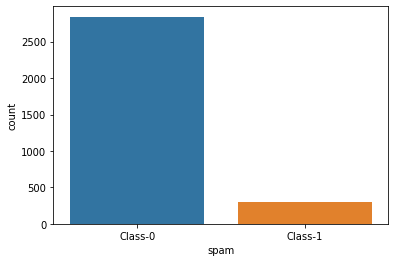

In [290]:
# visualize the target variable for class imbalance
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.countplot(spam_class_train_data_tf['spam'])
g.set_xticklabels(['Class-0','Class-1'])
plt.show()

In [291]:
# class count
spam_class_0_count, spam_class_1_count = spam_class_train_data_tf['spam'].value_counts()
print(spam_class_0_count , spam_class_1_count)
# Separate class
spam_class_0 = spam_class_train_data_tf[spam_class_train_data_tf['spam'] == 0]
spam_class_1 = spam_class_train_data_tf[spam_class_train_data_tf['spam'] == 1]
# print the shape of the class
print('Spam class 0:', spam_class_0.shape)
print('Spam class 1:', spam_class_1.shape)

2842 294
Spam class 0: (2842, 20)
Spam class 1: (294, 20)


We will use the Synthetic Minority Oversampling Technique (SMOTE) to generates synthetic data for the minority class.SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors

SMOTE algorithm works in 4 simple steps:
1. Choose a minority class as the input vector
2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
4. Repeat the steps until data is balanced

In [292]:
# import library
from imblearn.over_sampling import SMOTE
from collections import Counter
y_train_counter = Counter(y_train.ravel())
print('Original train dataset shape', y_train_counter)
smote = SMOTE(random_state=0)

# fit predictor and target variable
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resample train dataset shape', Counter(y_train_smote))


Original train dataset shape Counter({0: 2842, 1: 294})
Resample train dataset shape Counter({0: 2842, 1: 2842})


In [293]:
y_test_counter = Counter(y_test.ravel())
print('Original test dataset shape', y_test_counter)
smote = SMOTE(random_state=0)

# fit predictor and target variable
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

print('Resample test dataset shape', Counter(y_test_smote))

n_train_smote = len(X_train_smote)
n_test_smote = len(X_test_smote)

print(n_train_smote,n_test_smote)

Original test dataset shape Counter({0: 712, 1: 73})
Resample test dataset shape Counter({1: 712, 0: 712})
5684 1424


With above we see that we have balanced both the train and test dataset.

## **Solution to Assignment question (Q2-b)**

### ====================================================================

### **Creating some common utilities function**

In [294]:
#Creating some common function
#Creating Function for plotting the confusion Matrix
def plot_confusion_matrix(p_y_train, p_y_train_predictions, p_y_test, p_y_test_predictions):
          
    #Lets Calculate the confusion Matrix
    from sklearn.metrics import confusion_matrix
    train_conf_matrix = confusion_matrix(p_y_train,p_y_train_predictions)
    test_conf_matrix = confusion_matrix(p_y_test,p_y_test_predictions)
    print( "Train confusion matrix: \n", train_conf_matrix)
    print("Test confusion matrix: \n", test_conf_matrix)
    
    #Plotting the confusion matrix for better interpretation
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax1, ax2 = axes
    sns.heatmap(train_conf_matrix, annot=True, fmt='g', ax=ax1)
    sns.heatmap(test_conf_matrix, annot=True, fmt='g', ax=ax2)
    ax1.set_title('Train Data')
    ax1.xaxis.set_ticklabels(['0', '1'])
    ax1.yaxis.set_ticklabels(['0', '1'])
    ax2.set_title('Test Data')
    ax2.xaxis.set_ticklabels(['0', '1'])
    ax2.yaxis.set_ticklabels(['0', '1'])
    fig.suptitle('Confusion Matrix')

def print_classification_report(p_y_train, p_y_train_predictions, p_y_test, p_y_test_predictions):
    from sklearn.metrics import classification_report
    train_class_rpt = classification_report(p_y_train, p_y_train_predictions)
    print("======================================================")
    print("Train Classification Report:")
    print(train_class_rpt)
    print("======================================================")
    test_class_rpt = classification_report(p_y_test, p_y_test_predictions)
    print("Test Classification Report:")
    print(test_class_rpt)
    print("======================================================")

### **b.i) Implementing the Naive Bayes Classifier**

In [295]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB() #define a model using Gaussian version Naive Bayes classifier
nb_model.fit(X_train, y_train) #fit the model using the training data

y_train_predicted_nb = nb_model.predict(X_train)
y_test_predicted_nb = nb_model.predict(X_test)

**GaussianNB(priors, var_smoothing=1e-09)** command in *scikit-learn* package uses the following parameters:


*   *priors* as probabilities of the classes. (If specified the priors are not adjusted according to the data.)
*   *var_smoothing* is the portion of the largest variance of all features that is added to variances for calculation stability.

Naive Bayes Classifier statistics:

Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2842
           1       0.29      0.14      0.18       294

    accuracy                           0.89      3136
   macro avg       0.60      0.55      0.56      3136
weighted avg       0.86      0.89      0.87      3136

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       712
           1       0.46      0.30      0.36        73

    accuracy                           0.90       785
   macro avg       0.69      0.63      0.66       785
weighted avg       0.89      0.90      0.89       785

Train confusion matrix: 
 [[2743   99]
 [ 254   40]]
Test confusion matrix: 
 [[686  26]
 [ 51  22]]


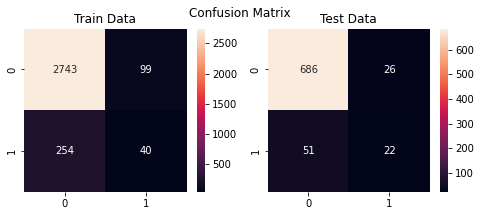

In [296]:
print('Naive Bayes Classifier statistics:\n')
print_classification_report(y_train,y_train_predicted_nb,y_test,y_test_predicted_nb)
plot_confusion_matrix( y_train,y_train_predicted_nb,y_test,y_test_predicted_nb)

**Lets calculate the prediction using the class balanced Data**

Shape of X Class Balanced:  (5684, 19)
Shape of y Class Balanced:  (5684,)

Naive Bayes Classifier statistics with Class Balanced Dataset:

Train Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.57      0.71      2842
           1       0.69      0.96      0.80      2842

    accuracy                           0.77      5684
   macro avg       0.81      0.77      0.76      5684
weighted avg       0.81      0.77      0.76      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.62      0.74       712
           1       0.71      0.96      0.82       712

    accuracy                           0.79      1424
   macro avg       0.82      0.79      0.78      1424
weighted avg       0.82      0.79      0.78      1424

Train confusion matrix: 
 [[1632 1210]
 [ 120 2722]]
Test confusion matrix: 
 [[439 273]
 [ 31 681]]


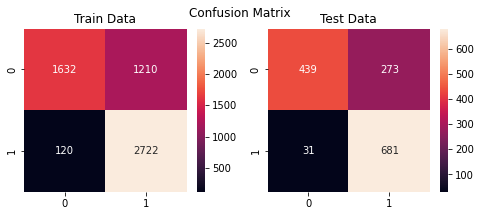

In [297]:
print("Shape of X Class Balanced: ", X_train_smote.shape)
print("Shape of y Class Balanced: ", y_train_smote.shape)

nb_model = GaussianNB() #define a model using Gaussian version Naive Bayes classifier
nb_model.fit(X_train_smote, y_train_smote) #fit the model using the training class balanced data

y_train_predicted_nb_bal = nb_model.predict(X_train_smote)
y_test_predicted_nb_bal = nb_model.predict(X_test_smote)
print('\nNaive Bayes Classifier statistics with Class Balanced Dataset:\n')
print_classification_report(y_train_smote,y_train_predicted_nb_bal , y_test_smote, y_test_predicted_nb_bal)
plot_confusion_matrix(y_train_smote,y_train_predicted_nb_bal , y_test_smote, y_test_predicted_nb_bal)

**Plot Correlation heat Map:**



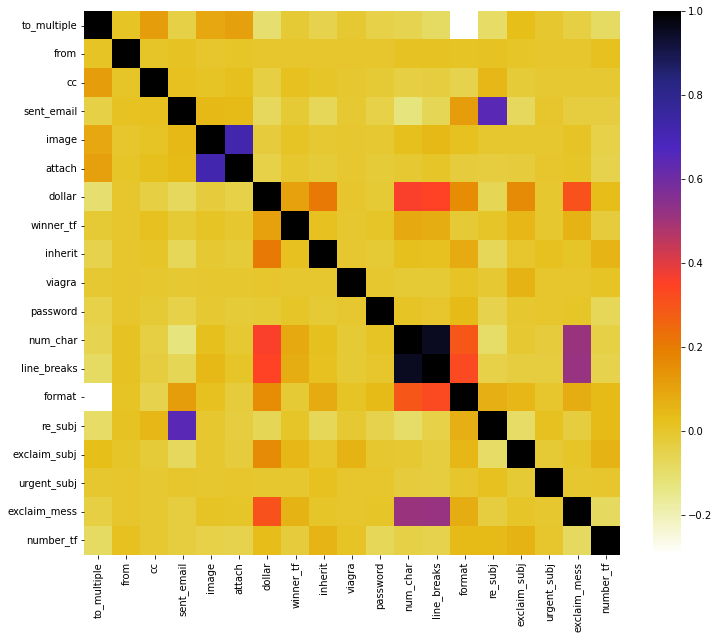

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.CMRmap_r)
plt.show()

**Implement Naive bayes on reduced feature train and test data**

Analysis of the heat map suggest that not all column are correlated to each except num_char and line_breaks.
Since Naive Bayes assume that feature(x varibale column) should not be correlated. So we are just dropping the correlated column to check if model give better performance.

In [299]:
#Dropping line_breaks features from the train data
train_X_df = X_train.copy()
train_X_df= train_X_df.drop(['line_breaks'], axis=1)
print(train_X_df)

#Dropping  line_breaks features from the test data

test_X_df = X_test.copy()
test_X_df= test_X_df.drop(['line_breaks'], axis=1)
print(test_X_df)

print("\nSee the number of feature has dropped from 19 to 18\n")

#Convert the reduced train and test data into numpy array
train_X_reduced = train_X_df.to_numpy()
print('Shape of Reduced Train Dataset :', np.shape(train_X_reduced))
test_X_reduced = test_X_df.to_numpy()
print('Shape of Reduced Test Dataset :', np.shape(test_X_reduced))


      to_multiple  from  cc  ...  urgent_subj  exclaim_mess  number_tf
0               0     1   0  ...            0             0          0
1               0     1   0  ...            0             1          2
2               0     1   0  ...            0            48          2
3               0     1   0  ...            0             1          1
4               0     1   0  ...            0             1          1
...           ...   ...  ..  ...          ...           ...        ...
3131            0     1   0  ...            0             3          2
3132            0     1   0  ...            0             0          0
3133            0     1   0  ...            0             0          2
3134            0     1   0  ...            0             1          2
3135            0     1   0  ...            0             0          2

[3136 rows x 18 columns]
     to_multiple  from  cc  ...  urgent_subj  exclaim_mess  number_tf
0              0     1   0  ...            0        

Naive Bayes Classifier statistics with reduced feature dataset:

Train Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2842
           1       0.29      0.11      0.16       294

    accuracy                           0.89      3136
   macro avg       0.60      0.54      0.55      3136
weighted avg       0.85      0.89      0.87      3136

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       712
           1       0.38      0.18      0.24        73

    accuracy                           0.90       785
   macro avg       0.65      0.57      0.59       785
weighted avg       0.87      0.90      0.88       785

Train confusion matrix: 
 [[2762   80]
 [ 262   32]]
Test confusion matrix: 
 [[691  21]
 [ 60  13]]


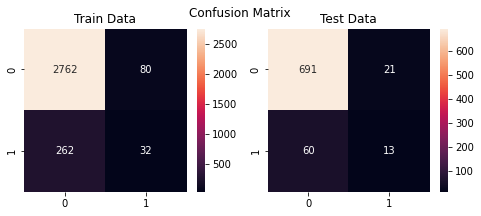

In [300]:
#Implement Naive bayes on reduced train and test data
nb_reduced_model = GaussianNB()
nb_reduced_model.fit(train_X_reduced, y_train)

predicted_train_reduced_y = nb_reduced_model.predict(train_X_reduced)
predicted_test_reduced_y = nb_reduced_model.predict(test_X_reduced)

print('Naive Bayes Classifier statistics with reduced feature dataset:\n')
print_classification_report(y_train,predicted_train_reduced_y, y_test, predicted_test_reduced_y)
plot_confusion_matrix(y_train,predicted_train_reduced_y, y_test, predicted_test_reduced_y)

Conclusion :  Reducing the fetaure have hardly any effect on the accurary prediction.

### **b.ii) Implementing the Logistic Regresssion Model**

In [301]:
#Let us now compute the size of train and test data
n_train_lrm = len(spam_class_train_data_tf.index) #number of data points in the data set
print('number of data points in the train data set:',n_train_lrm)
n_test_lrm = len(spam_class_test_data_tf.index) #number of data points in the data set
print('number of data points in the test data set:',n_test_lrm)

#extract the predictor variable columns(X variables) from train and test data.
X_train_lrm = spam_class_train_data_tf[spam_class_train_data_tf.columns[1:20]]
y_train_lrm = spam_class_train_data_tf[spam_class_train_data_tf.columns[0]]
X_test_lrm = spam_class_test_data_tf[spam_class_test_data_tf.columns[1:20]]
y_test_lrm = spam_class_test_data_tf[spam_class_test_data_tf.columns[0]]

number of data points in the train data set: 3136
number of data points in the test data set: 785


In [302]:
#Train the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=1e6)
logmodel.fit(X_train_lrm, y_train_lrm)

#Predict the y test
y_train_predictions_lrm = logmodel.predict(X_train_lrm)
y_test_predictions_lrm = logmodel.predict(X_test_lrm)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Metrics	Definition:**

**Precision**: Precision is defined as the ratio of true positives to the sum of true and false positives.

**Recall**:Recall is defined as the ratio of true positives to the sum of true positives and false negatives.

**F1 Score**:	The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.

**Support**: Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

Logistic Regression model statistics:

Train Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2842
           1       0.54      0.07      0.13       294

    accuracy                           0.91      3136
   macro avg       0.73      0.53      0.54      3136
weighted avg       0.88      0.91      0.87      3136

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       712
           1       0.73      0.15      0.25        73

    accuracy                           0.92       785
   macro avg       0.83      0.57      0.60       785
weighted avg       0.90      0.92      0.89       785

Train Accuracy: 0.9072066326530612
Test Accuracy: 0.9159235668789809

Train confusion matrix: 
 [[2824   18]
 [ 273   21]]
Test confusion matrix: 
 [[708   4]
 [ 62  11]]


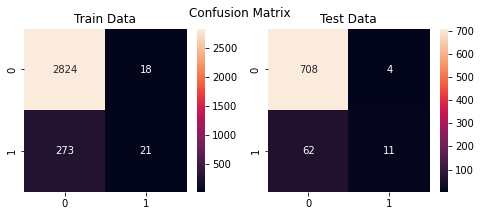

In [303]:
print('Logistic Regression model statistics:\n')
#Print Classificatin Report and confusion matrix
print_classification_report(y_train_lrm,y_train_predictions_lrm,y_test_lrm, y_test_predictions_lrm )

#Average accuracy on training data
print('Train Accuracy:', logmodel.score(X_train_lrm,y_train_lrm))

#Calculating the test accuracy
from sklearn.metrics import accuracy_score
test_accuracy_rm = accuracy_score(y_test_lrm, y_test_predictions_lrm)
print('Test Accuracy:', test_accuracy_rm) #Average accuracy on test data
print('=============================\n')

plot_confusion_matrix(y_train_lrm,y_train_predictions_lrm,y_test_lrm, y_test_predictions_lrm )

**Implement logistic Regression using class balance dataset**

In [304]:
#implement logistic Regression using class balance data
#Train the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=1e6)
logmodel.fit(X_train_smote, y_train_smote)

#Predict the y test
y_train_predictions_bal_lrm = logmodel.predict(X_train_smote)
y_test_predictions_bal_lrm = logmodel.predict(X_test_smote)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Model with Class Balanced Dataset:

Train Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      2842
           1       0.82      0.77      0.80      2842

    accuracy                           0.80      5684
   macro avg       0.80      0.80      0.80      5684
weighted avg       0.80      0.80      0.80      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       712
           1       0.83      0.81      0.82       712

    accuracy                           0.82      1424
   macro avg       0.82      0.82      0.82      1424
weighted avg       0.82      0.82      0.82      1424

Train confusion matrix: 
 [[2363  479]
 [ 640 2202]]
Test confusion matrix: 
 [[595 117]
 [135 577]]


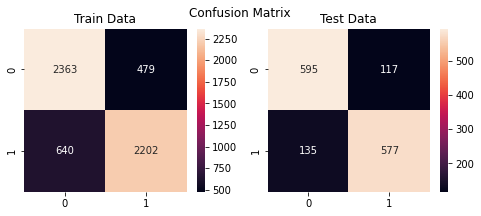

In [305]:
print('Logistic Regression Model with Class Balanced Dataset:\n')
print_classification_report(y_train_smote,y_train_predictions_bal_lrm,y_test_smote, y_test_predictions_bal_lrm )
plot_confusion_matrix(y_train_smote,y_train_predictions_bal_lrm,y_test_smote, y_test_predictions_bal_lrm )

### **=================================================================**

### **b.iii) Implementing the Soft Margin SVM**

In [306]:
from sklearn.svm import LinearSVC #linear svm from scikit learn 
clf = LinearSVC(random_state=0, tol=1e-5) #max_iter=10000

In [307]:
#copy some variable for SVM perspective
train_label= y_train_smote.copy()
train_features = X_train_smote.copy()
test_features = X_test_smote.copy()
test_label = y_test_smote.copy()
num_train = n_train_smote
num_test = n_test_smote

train_label = train_label.to_frame(name='spam')
test_label = test_label.to_frame(name='spam')

train_label = train_label.to_numpy()
train_features = train_features.to_numpy()
test_features= test_features.to_numpy()
test_label = test_label.to_numpy()

print('train_label:', train_label.shape, 'Type: ', type(train_label))
print('train_features:', train_features.shape ,'Type: ',  type(train_features))
print('test_features:', test_features.shape ,'Type: ',  type(test_features))
print('test_label:', test_label.shape,'Type: ',  type(test_label))

train_label: (5684, 1) Type:  <class 'numpy.ndarray'>
train_features: (5684, 19) Type:  <class 'numpy.ndarray'>
test_features: (1424, 19) Type:  <class 'numpy.ndarray'>
test_label: (1424, 1) Type:  <class 'numpy.ndarray'>


In [308]:
#Get the trained model in clf_model
train_label = np.reshape(train_label,(train_label.shape[0],))
clf_model = clf.fit(train_features,train_label)
#We will now use the trained model for predition on the test data set
predicted_test_labels = clf_model.predict(test_features)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [309]:
#reshaping predicted_labels so that it is of the same shape as test_label
predicted_test_labels = np.reshape(predicted_test_labels.data,(num_test,1))
#If you wish to see how predicted_labels and test_label look, you can print them and check
# print(predicted_test_labels)

#compute test set error and test set accuracy 
test_error = np.sum(0.5*np.abs(predicted_test_labels-test_label))/len(test_label)*100.0#Try to understand this equation
test_accuracy = 100.0-test_error 
#print the test set accuracy 
print('Test set accuracy:', test_accuracy)   

Test set accuracy: 90.55477528089888


In [310]:
#We can also use the trained model clf_model to predict the train set 
predicted_train_labels = clf_model.predict(train_features)
#reshaping predicted_train_labels so that it is of the same shape as train_label
predicted_train_labels = np.reshape(predicted_train_labels.data,(num_train,1))
#compute train set error and train set accuracy
train_label = np.reshape(train_label,(num_train,1))
train_error = np.sum(0.5*np.abs(predicted_train_labels-train_label))/len(train_label)*100.0
train_accuracy = 100.0-train_error 
#print the train set accuracy
print('Train set accuracy:', train_accuracy)

Train set accuracy: 90.93947923997185


Soft Margin SVM Statistics: 

Train Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      2842
           1       0.82      0.68      0.74      2842

    accuracy                           0.76      5684
   macro avg       0.77      0.76      0.76      5684
weighted avg       0.77      0.76      0.76      5684

Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       712
           1       0.76      0.92      0.83       712

    accuracy                           0.81      1424
   macro avg       0.83      0.81      0.81      1424
weighted avg       0.83      0.81      0.81      1424

Train confusion matrix: 
 [[2425  417]
 [ 920 1922]]
Test confusion matrix: 
 [[501 211]
 [ 58 654]]


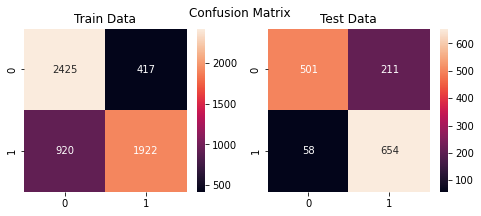

In [341]:
print('Soft Margin SVM Statistics: \n')
print_classification_report(train_label, predicted_train_labels,test_label, predicted_test_labels)
plot_confusion_matrix(train_label, predicted_train_labels,test_label, predicted_test_labels)


### **=============================================================**

### **b.iv) Implementing Descision Tree Classification**

Here we will implement the decision Tree classifier

In [312]:
#import the decision tree from scikit learn 
from sklearn import tree 

[Text(0.6, 0.8333333333333334, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 5684\nvalue = [2842, 2842]'),
 Text(0.4, 0.5, 'X[11] <= 2.056\nentropy = 0.979\nsamples = 4849\nvalue = [2007, 2842]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.676\nsamples = 2339\nvalue = [417, 1922]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.948\nsamples = 2510\nvalue = [1590, 920]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 835\nvalue = [835, 0]')]

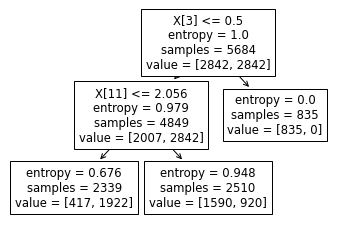

In [313]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
#train using decision tree classifier and plot the resultant decision tree
tree.plot_tree(clf.fit(train_features, train_label))  

In [314]:
#Get the trained model in clf_model
clf_model = clf.fit(train_features,train_label)
#We will now use the trained model for predition on the test data set
predicted_labels = clf_model.predict(test_features)

In [315]:
#reshaping predicted_labels so that it is of the same shape as test_label
predicted_labels = np.reshape(predicted_labels.data,(num_test,1))
#If you wish to see how predicted_labels and test_label look, you can print them and check
#print(predicted_labels)
#print(test_label)

In [316]:
#compute test set error and test set accuracy 
test_error = np.sum(0.5*np.abs(predicted_labels-test_label))/len(test_label)*100.0#Try to understand this equation
test_accuracy = 100.0-test_error 
#print the test set accuracy 
print('test set accuracy:', test_accuracy)

test set accuracy: 87.78089887640449


In [317]:
#We can also use the trained model clf_model to predict the train set 
predicted_train_labels = clf_model.predict(train_features)
#reshaping predicted_train_labels so that it is of the same shape as train_label
predicted_train_labels = np.reshape(predicted_train_labels.data,(num_train,1))
#compute train set error and train set accuracy 
train_error = np.sum(0.5*np.abs(predicted_train_labels-train_label))/len(train_label)*100.0
train_accuracy = 100.0-train_error 
#print the test set accuracy 
print('train set accuracy:', train_accuracy)

train set accuracy: 88.23891625615764


In [318]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(train_label, predicted_train_labels)
print("Confusion Matrix (train set):")
print(cm_train)
cm_test = confusion_matrix(test_label, predicted_labels)
print("Confusion Matrix (test set):")
print(cm_test)

Confusion Matrix (train set):
[[2425  417]
 [ 920 1922]]
Confusion Matrix (test set):
[[585 127]
 [221 491]]


Text(0.5, 0.98, 'Confusion Matrix')

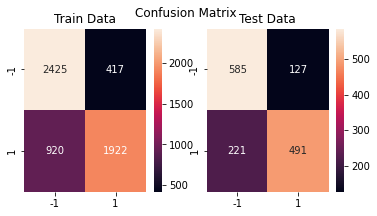

In [319]:
#Plotting the confusion matrix for better interpretation
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=(6, 3))
ax1, ax2 = axes
sns.heatmap(cm_train, annot=True, fmt='g', ax=ax1)
sns.heatmap(cm_test, annot=True, fmt='g', ax=ax2)
ax1.set_title('Train Data')
ax1.xaxis.set_ticklabels(['-1', '1'])
ax1.yaxis.set_ticklabels(['-1', '1'])
ax2.set_title('Test Data')
ax2.xaxis.set_ticklabels(['-1', '1'])
ax2.yaxis.set_ticklabels(['-1', '1'])
fig.suptitle('Confusion Matrix')

In [320]:
from sklearn.metrics import classification_report
train_cr = classification_report(train_label, predicted_train_labels)
print("Train Report:")
print(train_cr)
test_cr = classification_report(test_label, predicted_labels)
print("Test Report:")
print(test_cr)

Train Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      2842
           1       0.82      0.68      0.74      2842

    accuracy                           0.76      5684
   macro avg       0.77      0.76      0.76      5684
weighted avg       0.77      0.76      0.76      5684

Test Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       712
           1       0.79      0.69      0.74       712

    accuracy                           0.76      1424
   macro avg       0.76      0.76      0.75      1424
weighted avg       0.76      0.76      0.75      1424



### **=============================================================**

### **b.v) Implementing Random Forest Classification**

In [321]:
X_train

,to_multiple,from,cc,sent_email,image,attach,dollar,winner_tf,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_tf
0,0,1,0,0,0,0,0,0,0,0,0,11.370,202,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,10.504,202,1,0,0,0,1,2
2,0,1,0,0,0,0,0,0,0,0,0,13.256,255,1,0,0,0,48,2
3,0,1,0,0,0,0,0,0,0,0,2,1.231,29,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,0,0,2,1.091,25,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,0,1,0,0,0,0,2,0,0,0,0,1.597,46,0,0,1,0,3,2
3132,0,1,0,0,0,0,1,0,0,0,0,0.333,13,0,0,0,0,0,0
3133,0,1,0,0,0,0,0,0,0,0,0,0.332,12,0,0,0,0,0,2
3134,0,1,0,0,0,0,2,1,0,0,0,2.225,65,0,0,1,0,1,2


In [322]:
print('shape of train data features:')
print(X_train.shape)
print('shape of train data labels')
print(y_train.shape)

print('shape of test data features:')
print(X_test.shape)
print('shape of test data labels')
print(y_test.shape)



shape of train data features:
(3136, 19)
shape of train data labels
(3136,)
shape of test data features:
(785, 19)
shape of test data labels
(785,)


In [323]:

num_features = X_train.shape[1]
num_features

19

In [324]:
#Let us now use cross validation to find random forest hyperparameters.
# We will first find best max depths for a given set of estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import math
import numpy as np

num_features = X_train.shape[1]
estimators = [5, 10,50,100,150,200]
constant = math.sqrt(num_features)
max_depth = constant*np.array([0.25,0.5, 0.75,1,1.25,1.50,1.75,2])
max_depth = np.ceil(max_depth)
print ('maximum depth', max_depth)
best_depth = {}
cv_k = 5 #5-fold cross validation
for n_estimate in estimators:
  avg_score = np.zeros(len(max_depth))
  # print (avg_score)
  for depth in max_depth:
    clf_rf = RandomForestClassifier(n_estimators = n_estimate,max_depth = depth,  random_state=0)
    scores = cross_val_score(clf_rf, X_train, y_train, cv=cv_k) 
    # print ('scores',scores)
    avg_score[np.where(max_depth==depth)] = np.mean(scores)

  # print ('avg score',avg_score)
  max_score_index = np.argmax(avg_score)
  # print (max_score_index)
  best_depth[n_estimate] = max_depth[int(max_score_index)]

print ('maximum depth = ', best_depth)

maximum depth [2. 3. 4. 5. 6. 7. 8. 9.]
maximum depth =  {5: 8.0, 10: 9.0, 50: 9.0, 100: 9.0, 150: 9.0, 200: 9.0}


In [325]:
## Now let's find the number of estimators
avg_score = np.zeros(len(estimators))
# print (estimators)
for n_estimate in estimators:
    depth = best_depth[n_estimate]
    clf_rf = RandomForestClassifier(n_estimators = n_estimate,max_depth = depth,  random_state=0)
    scores = cross_val_score(clf_rf, X_train, y_train, cv=cv_k) 
    avg_score[estimators.index(n_estimate)] = np.mean(scores)

print ('avg score =',avg_score)
max_score_index = np.argmax(avg_score)
best_estimator = estimators[max_score_index]
best_max_depth = best_depth[best_estimator]
print ('Number of estimators = ',best_estimator)
print ('maximum depth =',best_max_depth)

avg score = [0.91709688 0.92411544 0.92443442 0.92538984 0.92411443 0.92411443]
Number of estimators =  100
maximum depth = 9.0


In [326]:
# train and test accuracy using random forest classifier
from sklearn.metrics import accuracy_score
clf_rf = RandomForestClassifier(n_estimators = best_estimator,max_depth = best_max_depth,  random_state=0)
clf_model = clf_rf.fit(X_train, y_train)
train_y_predicted = clf_model.predict(X_train)
train_acc_rf = accuracy_score(y_train, train_y_predicted)
test_y_predicted = clf_model.predict(X_test)
test_acc_rf = accuracy_score(y_test, test_y_predicted)
print('train accuracy from Random forest:', train_acc_rf)
print('test accuracy from Random forest:', test_acc_rf)

train accuracy from Random forest: 0.9556760204081632
test accuracy from Random forest: 0.9312101910828026


In [327]:
## We will first find the appropriate max depth of decision tree using cross validation.
from sklearn import tree #decision tree from scikit learn 

avg_score = np.zeros(len(max_depth))
for depth in max_depth:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    scores = cross_val_score(clf, X_train, y_train, cv=cv_k) 
    avg_score[np.where(max_depth == depth)] = np.mean(scores)

print ('avg score =',avg_score)
max_score_index = np.argmax(avg_score)
best_max_depth = max_depth[max_score_index]
print ('maximum depth =',best_max_depth)

avg score = [0.90625006 0.90115198 0.8954129  0.89892116 0.90370483 0.90274586
 0.90210181 0.90114436]
maximum depth = 2.0


In [328]:
# train and test accuracy using decision tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=best_max_depth)
clf_model = clf.fit(X_train, y_train)
train_y_predicted = clf_model.predict(X_train)
train_acc = accuracy_score(y_train, train_y_predicted)
test_y_predicted = clf_model.predict(X_test)
test_acc = accuracy_score(y_test, test_y_predicted)
print('train accuracy from decision tree:', train_acc)
print('test accuracy from decision tree:', test_acc)
print ('##############')
print('train accuracy from Random forest:', train_acc_rf)
print('test accuracy from Random forest:', test_acc_rf)

train accuracy from decision tree: 0.90625
test accuracy from decision tree: 0.9070063694267516
##############
train accuracy from Random forest: 0.9556760204081632
test accuracy from Random forest: 0.9312101910828026


In [329]:
#Create confusion Matrix
from sklearn.metrics import confusion_matrix , accuracy_score
cm_rf_test = confusion_matrix(y_test, test_y_predicted)
print(cm_rf_test)
cm_rf_train = confusion_matrix(y_train, train_y_predicted)
print(cm_rf_train)



[[712   0]
 [ 73   0]]
[[2842    0]
 [ 294    0]]


Text(0.5, 0.98, 'Confusion Matrix')

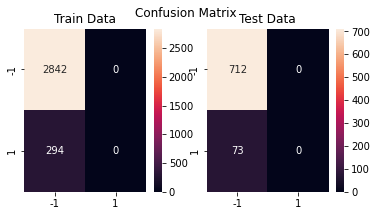

In [330]:
#Plotting the confusion matrix for better interpretation
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=(6, 3))
ax1, ax2 = axes
sns.heatmap(cm_rf_train, annot=True, fmt='g', ax=ax1)
sns.heatmap(cm_rf_test, annot=True, fmt='g', ax=ax2)
ax1.set_title('Train Data')
ax1.xaxis.set_ticklabels(['-1', '1'])
ax1.yaxis.set_ticklabels(['-1', '1'])
ax2.set_title('Test Data')
ax2.xaxis.set_ticklabels(['-1', '1'])
ax2.yaxis.set_ticklabels(['-1', '1'])
fig.suptitle('Confusion Matrix')

In [331]:
#Classification Report
from sklearn.metrics import classification_report
train_cr_rf = classification_report(y_train, train_y_predicted)
print("Train Report:")
print(train_cr_rf)
test_cr_rf = classification_report(y_test, test_y_predicted)
print("Test Report:")
print(test_cr_rf)

Train Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2842
           1       0.00      0.00      0.00       294

    accuracy                           0.91      3136
   macro avg       0.45      0.50      0.48      3136
weighted avg       0.82      0.91      0.86      3136

Test Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       712
           1       0.00      0.00      0.00        73

    accuracy                           0.91       785
   macro avg       0.45      0.50      0.48       785
weighted avg       0.82      0.91      0.86       785



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

### **=============================================================**

### **b.vi) Implementing Kernel Machine Classification**

To train the kernel SVM, we use the same SVC class of the Scikit-Learn's svm library. The difference lies in the value for the kernel parameter of the SVC class. In the case of the simple SVM we used "linear" as the value for the kernel parameter. However, for kernel SVM you can use Gaussian, polynomial, sigmoid, or computable kernel. We will implement polynomial, Gaussian, and sigmoid kernels to see which one works better for our problem.

In [332]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=3)
svclassifier.fit(X_train, y_train)

SVC(kernel='poly')

In [333]:
y_pred = svclassifier.predict(X_test)

In [334]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[712   0]
 [ 73   0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       712
           1       0.00      0.00      0.00        73

    accuracy                           0.91       785
   macro avg       0.45      0.50      0.48       785
weighted avg       0.82      0.91      0.86       785



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [335]:
#Implement Gaussian Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [336]:
y_pred = svclassifier.predict(X_test)

In [337]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[712   0]
 [ 73   0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       712
           1       0.00      0.00      0.00        73

    accuracy                           0.91       785
   macro avg       0.45      0.50      0.48       785
weighted avg       0.82      0.91      0.86       785



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [338]:
#implement Sigmoid Kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [339]:
y_pred = svclassifier.predict(X_test)

In [340]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[712   0]
 [ 73   0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       712
           1       0.00      0.00      0.00        73

    accuracy                           0.91       785
   macro avg       0.45      0.50      0.48       785
weighted avg       0.82      0.91      0.86       785



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
